Successfully fetched Kaggle dataset.
Successfully read synthetic dataset from CSV.
Data screenshot saved as kaggle_data_screenshot.png


ERROR:root:Error reading log file: [Errno 2] No such file or directory: 'data_ingestion.log'


Data screenshot saved as synthetic_data_screenshot.png
Error reading log file: [Errno 2] No such file or directory: 'data_ingestion.log'
Starting scheduled data ingestion...
Successfully fetched Kaggle dataset.
Successfully read synthetic dataset from CSV.
Data screenshot saved as kaggle_data_screenshot.png
Data screenshot saved as synthetic_data_screenshot.png
Data ingestion cycle completed. Sleeping...


KeyboardInterrupt: 

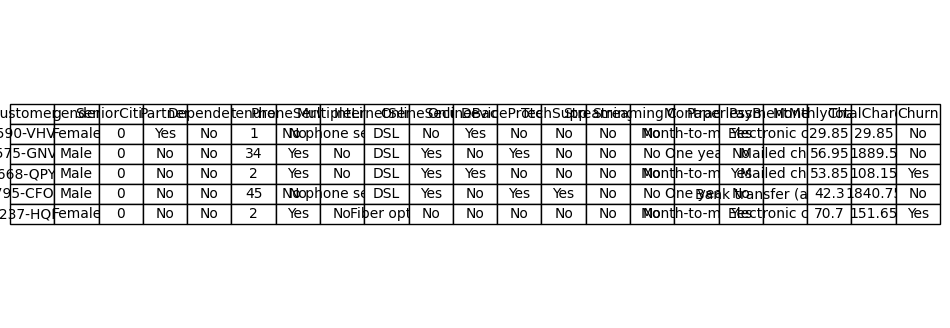

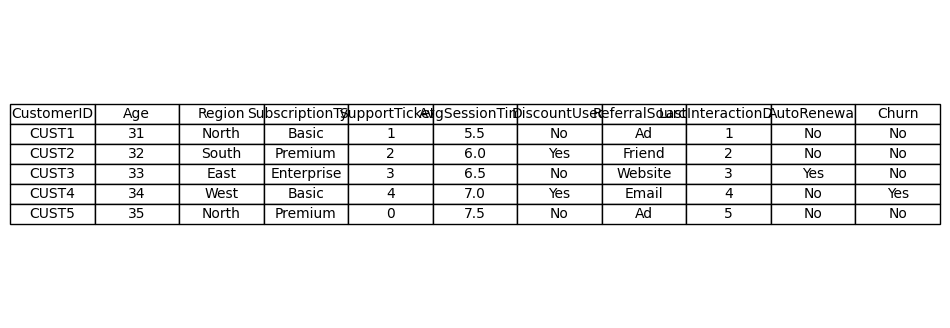

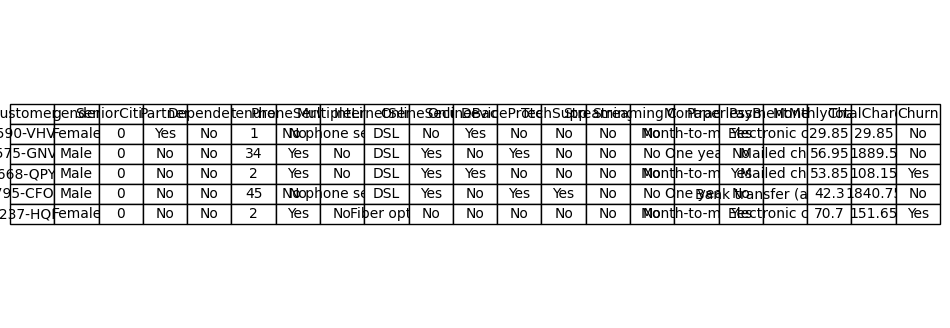

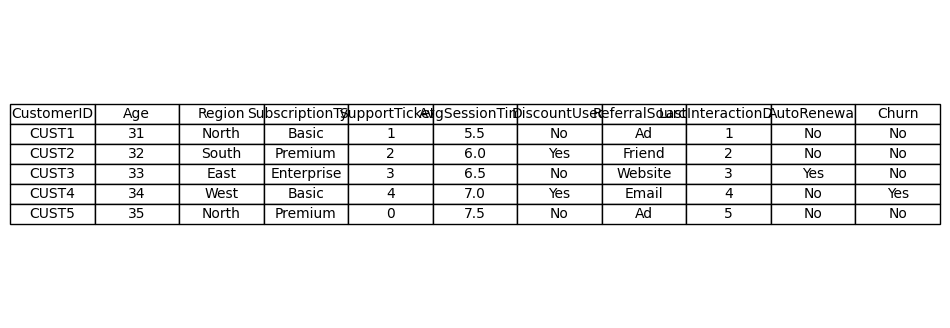

In [9]:
# Google Colab Notebook: Data Ingestion for Churn Prediction

## **1️⃣ Introduction**
# This notebook demonstrates data ingestion from two sources:
# - Kaggle Telco Customer Churn Dataset (CSV File)
# - Synthetic Customer Churn Dataset (Read from CSV File)

# We will ensure:
# - Automated fetching of data
# - Error handling
# - Logging for monitoring
# - Log verification
# - Screenshot of ingested data

## **2️⃣ Install & Import Dependencies**
import pandas as pd
import os
import logging
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Setup logging
logging.basicConfig(filename="data_ingestion.log", level=logging.INFO,
                    format="%(asctime)s - %(levelname)s - %(message)s")

def log_message(message, level="info"):
    """Helper function to log messages"""
    if level == "info":
        logging.info(message)
    elif level == "error":
        logging.error(message)
    print(message)

## **3️⃣ Data Ingestion from Kaggle CSV (Telco Customer Churn Dataset)**
kaggle_dataset_url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv"
kaggle_csv_path = "telco_churn.csv"

def fetch_kaggle_data():
    """Fetches the Kaggle dataset and saves it locally"""
    try:
        df = pd.read_csv(kaggle_dataset_url)
        df.to_csv(kaggle_csv_path, index=False)
        log_message("Successfully fetched Kaggle dataset.")
        return df
    except Exception as e:
        log_message(f"Error fetching Kaggle dataset: {e}", level="error")
        return None

## **4️⃣ Read Synthetic Dataset from CSV**
synthetic_csv_path = "synthetic_churn.csv"

def read_synthetic_data():
    """Reads the synthetic dataset from CSV file"""
    try:
        df = pd.read_csv(synthetic_csv_path)
        log_message("Successfully read synthetic dataset from CSV.")
        return df
    except Exception as e:
        log_message(f"Error reading synthetic dataset: {e}", level="error")
        return None

## **5️⃣ Log Verification**
def display_latest_logs(log_file="data_ingestion.log", num_lines=10):
    """Displays the last few log messages"""
    try:
        with open(log_file, "r") as file:
            lines = file.readlines()
            print("\nLast few log entries:")
            for line in lines[-num_lines:]:
                print(line.strip())
    except Exception as e:
        log_message(f"Error reading log file: {e}", level="error")

## **6️⃣ Screenshot of Ingested Data**
def save_data_screenshot(df, filename="data_screenshot.png"):
    """Saves a screenshot of the first few rows of the dataset"""
    try:
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.axis("off")
        table = ax.table(cellText=df.head().values,
                          colLabels=df.columns,
                          cellLoc='center',
                          loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        plt.savefig(filename, bbox_inches='tight')
        log_message(f"Data screenshot saved as {filename}")
    except Exception as e:
        log_message(f"Error saving data screenshot: {e}", level="error")

## **7️⃣ Automating Data Ingestion**
def scheduled_data_ingestion(interval=3600):
    """Automates data fetching periodically"""
    while True:
        log_message("Starting scheduled data ingestion...")
        kaggle_df = fetch_kaggle_data()
        synthetic_df = read_synthetic_data()
        if kaggle_df is not None:
            save_data_screenshot(kaggle_df, "kaggle_data_screenshot.png")
        if synthetic_df is not None:
            save_data_screenshot(synthetic_df, "synthetic_data_screenshot.png")
        log_message("Data ingestion cycle completed. Sleeping...")
        time.sleep(interval)  # Wait for the next cycle (default: 1 hour)

## **8️⃣ Run Data Ingestion**
kaggle_df = fetch_kaggle_data()
synthetic_df = read_synthetic_data()

# Save screenshots
if kaggle_df is not None:
    save_data_screenshot(kaggle_df, "kaggle_data_screenshot.png")
if synthetic_df is not None:
    save_data_screenshot(synthetic_df, "synthetic_data_screenshot.png")

# Display logs
display_latest_logs()

# To run scheduled ingestion, uncomment the following line
scheduled_data_ingestion(interval=86400)  # Runs once every 24 hours

# New Section